[View in Colaboratory](https://colab.research.google.com/github/avs20/GNoidaMLBatch/blob/master/Lesson1-RandomForest.ipynb)

### Google Colaboratory 

Google Colab is a jupyter like tool given by Google where we can run our machine learning code in the GPU or High perfornmance CPU modes. 

All the softwares / libarries can be installed here and we can use jus the internet to work with it. 


#### How to open google Colab

Go to the link [https://colab.research.google.com/](https://colab.research.google.com/) and then you can create a new note book which will be saved in your Google Drive. 


#### Commands in Google Colab

Google Colab run a Ubuntu VM in the background and you can use this to run the commands on the backend. 

To run the commands on the terminal to install any tool / library use `!`

eg. 
```
!pip install pandas 
```

To Dowload any data file from the internet use `wget`

```
!wget full_path_of_file_from_internet
```




#### Downloading the housing data from the Github to Google Colab

In [3]:
!wget https://raw.githubusercontent.com/avs20/MSIT_ML_CLASS/master/datasets/ames_housing_trimmed_processed.csv


Redirecting output to ‘wget-log’.


In [4]:
!ls

ames_housing_trimmed_processed.csv  sample_data  wget-log


#### Loading the data with pandas

In [0]:
import pandas as pd
import numpy as np 

In [6]:
df_raw = pd.read_csv('ames_housing_trimmed_processed.csv')
# print the first 5 rows of the DataFrame
df_raw.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
0,60,65.0,8450,7,5,2003,0,1710,1,0,...,0,0,0,0,1,0,0,0,1,208500
1,20,80.0,9600,6,8,1976,0,1262,0,1,...,0,1,0,0,0,0,0,0,1,181500
2,60,68.0,11250,7,5,2001,1,1786,1,0,...,0,0,0,0,1,0,0,0,1,223500
3,70,60.0,9550,7,5,1915,1,1717,1,0,...,0,0,0,0,1,0,0,0,1,140000
4,60,84.0,14260,8,5,2000,0,2198,1,0,...,0,0,0,0,1,0,0,0,1,250000


In [7]:
!head ./ames_housing_trimmed_processed.csv

MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
60,65.0,8450,7,5,2003,0,1710,1,0,2,1,3,0,548,0,0,1,0,0,0,0,0,1,0,0,0,0

In [8]:
#Print the column names

df_raw.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'Remodeled', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_

In [9]:
# Seeing the column data types
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
MSSubClass              1460 non-null int64
LotFrontage             1460 non-null float64
LotArea                 1460 non-null int64
OverallQual             1460 non-null int64
OverallCond             1460 non-null int64
YearBuilt               1460 non-null int64
Remodeled               1460 non-null int64
GrLivArea               1460 non-null int64
BsmtFullBath            1460 non-null int64
BsmtHalfBath            1460 non-null int64
FullBath                1460 non-null int64
HalfBath                1460 non-null int64
BedroomAbvGr            1460 non-null int64
Fireplaces              1460 non-null int64
GarageArea              1460 non-null int64
MSZoning_FV             1460 non-null int64
MSZoning_RH             1460 non-null int64
MSZoning_RL             1460 non-null int64
MSZoning_RM             1460 non-null int64
Neighborhood_Blueste    1460 non-null int64
Neighborhoo

In [10]:
# The predictor or dependent variable

df_raw['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# Preprocessin Data

1. Separate Dependent and Independent Variables 

Separate prediction variable from the dataset 

In [0]:
X = df_raw.drop('SalePrice', axis=1)
y = df_raw['SalePrice']

In [15]:
print(X.shape)
print(y.shape)

(1460, 56)
(1460,)


# Model Training 

In [16]:

model = RandomForestRegressor()

# to train a model use fit()

model.fit(X,y)

#calculate predictions
predictions = model.predict(X)

#check score
model.score(X, y)



0.969103195299977

Divide the data in test and train to check our model

# Using numpy

In [18]:
#Seeing the datatype of the X
type(X)

pandas.core.frame.DataFrame

In [19]:
# How to convert to numpy array
type(X.values)

numpy.ndarray

In [21]:
#take 1000 rows for training and 460 for testing 

train_X = X.values[0:1000,:]
train_y = y.values[0:1000]

test_X = X.values[1000:, :]
test_y = y.values[1000:]

print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(1000, 56) (1000,)
(460, 56) (460,)


In [22]:

model = RandomForestRegressor()

# to train a model use fit()

model.fit(train_X,train_y)

#calculate predictions
# predictions = model.predict(X)

#check score
model.score(test_X, test_y)



0.803294514681229

# R2 value

In [23]:
predictions = model.predict(test_X)

SSreg = np.sum((predictions - test_y)**2)
SStot = np.sum((test_y - test_y.mean())**2)

r2= 1 - (SSreg / SStot)

r2

0.803294514681229

In [0]:
# Code to plot a decision tree


# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(dtree, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

# What is Random Forest

In [36]:
model = RandomForestRegressor(n_jobs = -1,
                              n_estimators=1, max_depth=3)

model.fit(train_X, train_y)

model.score(test_X, test_y)

0.5518313330429234

In [34]:
#!pip install pydotplus
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3 libgraphite2-3
  libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7 libpango-1.0-0
  libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4 libpixman-1-0
  libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0 libxcb-shm0
  libxmu6 libxpm4 libxt6
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig graphviz libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgraphite2-3 libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
0 upgraded, 28 newly installed, 0 to remove and 0 not upgraded.
Need to get 4,122 kB of archives.
After this operation, 2

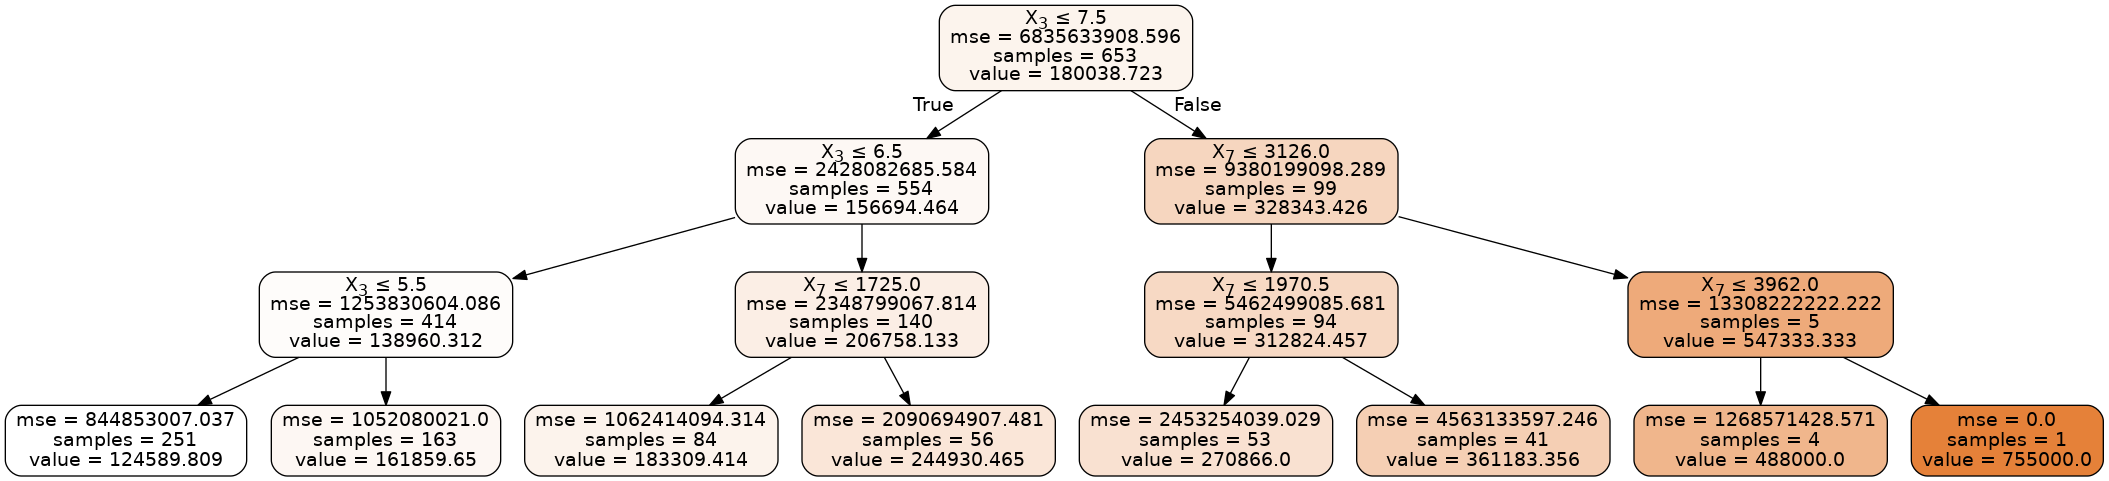

In [37]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model.estimators_[0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Random Forest Working

In [38]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(train_X, train_y)

model.score(test_X, test_y)

0.8191196956776639

In [40]:
len(model.estimators_)

10

In [44]:
sum =0
for tree in model.estimators_:
  sum += tree.score(test_X, test_y)
  print(tree.score(test_X, test_y))
  
print("Average,", sum / 10)

0.47193637692049617
0.6077617753216851
0.5520856587656324
0.5232256870022491
0.5441496960465433
0.6462655910094616
0.689472320527069
0.5283320529316453
0.5646999401987841
0.7249190810409214
Average, 0.5852848179764487


This is just to show that individually the R2 of the trees in the forest is not good but the overall R2 of the forest is better than trees. 